In [ ]:
# All the dataset file should be in the same folder where you import the jyupitar notebook(ipynb).

In [1]:
import pandas as pd
import numpy as np 
from textblob import TextBlob

import re    # RegEx for removing non-letter characters
import nltk  # natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize,word_tokenize

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ALYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
! pip install vaderSentiment

In [3]:
from time import sleep
import json
import pandas as pd
import io
import re
import numpy as np
from tqdm import tqdm
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm

from sklearn import preprocessing
import matplotlib.pyplot as plt
# from plotly.offline import init_notebook_mode, iplot
# import plotly.graph_objs as go
# init_notebook_mode(connected=True) 

In [4]:
df_raw = pd.read_csv("Bitcoin_tweets.csv", encoding = "ISO-8859-1")
tweets_clean_file = 'Bitcoin_tweets_clean.csv'
print(df_raw.shape)
df_raw.head(5)

C:\Users\ALYA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(2259788, 13)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,ð BITCOINLIVE is a Dutch platform aimed at ...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"ð Today, that's this #Thursday, we will do ...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier ð¦ð¹ð¸ðª #FactsSupersp...,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259788 entries, 0 to 2259787
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_name         object 
 1   user_location     object 
 2   user_description  object 
 3   user_created      object 
 4   user_followers    float64
 5   user_friends      object 
 6   user_favourites   object 
 7   user_verified     object 
 8   date              object 
 9   text              object 
 10  hashtags          object 
 11  source            object 
 12  is_retweet        object 
dtypes: float64(1), object(12)
memory usage: 224.1+ MB


In [6]:
# clean df 
df_raw = df_raw.sort_values(by = 'date')
dd = df_raw.sample(frac=0.01, replace=False, random_state=1)
dd.reset_index(inplace=True)
for i,s in enumerate(tqdm(dd['text'],position=0, leave=True)):
    text = str(dd.loc[i, 'text'])
    text = text.replace("#", "")
    text = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', text, flags=re.MULTILINE)
    text = re.sub('@\\w+ *', '', text, flags=re.MULTILINE)
    dd.loc[i, 'text'] = text
# f = open(tweets_clean_file, 'a+', encoding='utf-8')
dd.to_csv(tweets_clean_file, header=True, encoding='utf-8',index=False)

100%|██████████| 22598/22598 [00:48<00:00, 466.35it/s]


In [7]:
df_clean = pd.read_csv(tweets_clean_file)

In [8]:
df_clean

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,195760,Ù Ø­Ù Ø¯,esfahan,âââØ®ÙØ¯Øª Ø±Ù Ø¨Ù Ø®ÙØ¯Øª Ø«Ø§Ø¨Øª ...,2021-01-02 19:08:56,616.0,1683.0,1712.0,False,2021-06-22 05:22:52,nice project \n\n\n\n\n\nortcoin ort okratech ...,"['ortcoin', 'ort', 'okratech', 'bitcoin', 'air...",Twitter for Android,False
1,1135874,Crypto Revolution Merchandise ð,NaN,Crypto Revolution the Wave of change ððð...,2019-10-13 06:16:05,451.0,2045.0,45077.0,False,2021-08-25 07:06:40,Long Bitcoin short the banks ð§,['Bitcoin'],Twitter Web App,False
2,332828,STRATOà¸¿ITZ,USA,Digital Token Entrepreneur | Top Mod @ https:/...,2014-04-25 19:40:15,468.0,111.0,1262.0,False,2021-07-02 19:37:18,Top Trending Cryptocurrency Post - DOGECOIN Se...,"['Cryptocurrency', 'Bitcoin']",IFTTT,False
3,581946,U.Today,"New York, USA",https://t.co/Tt6MRU7xb1 is an independent orga...,2018-01-17 09:28:59,35990.0,4447.0,682.0,False,2021-07-24 14:14:53,Can one expect another wave of BTC's decline s...,['BTC'],get shares,False
4,108170,Mr Fulcanelli,Argentina,"be decentralized, be a smart contract",2010-08-23 20:41:38,164.0,100.0,9295.0,False,2021-05-29 15:52:17,We will seeâ¦\n\nbitcoin btc bnb band bake $b...,"['bitcoin', 'btc', 'bnb', 'band', 'bake']",Twitter for Mac,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22593,427149,Mannie,"Dallas, TX",#BTC #ETH #LINK,2016-10-10 06:09:26,38.0,220.0,1989.0,False,2021-07-22 15:18:56,Bitcoin is the American dream. Today I have fi...,['Bitcoin'],Twitter for iPhone,False
22594,1170736,Julio Medina,127.0.0.1,ððºð¸ Vet ð Marketing & Business ð...,2008-05-26 17:59:02,4058.0,3023.0,1194.0,False,2021-08-23 22:00:04,"If you invested your $1,400.00 stimulus check ...",['bitcoin'],Year In Progress,False
22595,235220,Sky Luke Water ð¥ð¥¤ð¶ð,Cape Town,why haven't i 10x yet\n\n ~ #shitcoins ftw,2009-06-18 17:50:51,282.0,735.0,4827.0,False,2021-06-21 09:09:22,when glacier mining\n\n$btc Bitcoin,['Bitcoin'],Twitter Web App,False
22596,451169,yunusuuum,El Salvador,"E-postanÄ±n,posta endÃ¼strisine yaptÄ±ÄÄ±nÄ± ...",2020-09-01 06:05:04,14.0,267.0,487.0,False,2021-07-21 20:11:28,ANKR COIN will soon come to its new target of ...,"['ankr', 'Bitcoin']",Twitter for Android,False


In [9]:
df_clean["text"]

0        nice project \n\n\n\n\n\nortcoin ort okratech ...
1                        Long Bitcoin short the banks ð§
2        Top Trending Cryptocurrency Post - DOGECOIN Se...
3        Can one expect another wave of BTC's decline s...
4        We will seeâ¦\n\nbitcoin btc bnb band bake $b...
                               ...                        
22593    Bitcoin is the American dream. Today I have fi...
22594    If you invested your $1,400.00 stimulus check ...
22595                  when glacier mining\n\n$btc Bitcoin
22596    ANKR COIN will soon come to its new target of ...
22597    Today's Titan WOTD: Halving\n\nHalving is when...
Name: text, Length: 22598, dtype: object

In [10]:
analyzer = SentimentIntensityAnalyzer()
compound = []
for i,s in enumerate(tqdm(df_clean['text'],position=0, leave=True)):
    # print(i,s)
    vs = analyzer.polarity_scores(str(s))
    compound.append(vs["compound"])
df_clean["compound"] = compound
df_clean.head(2)

100%|██████████| 22598/22598 [00:03<00:00, 5703.27it/s]


,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound
0,195760,Ù Ø­Ù Ø¯,esfahan,âââØ®ÙØ¯Øª Ø±Ù Ø¨Ù Ø®ÙØ¯Øª Ø«Ø§Ø¨Øª ...,2021-01-02 19:08:56,616.0,1683.0,1712.0,False,2021-06-22 05:22:52,nice project \n\n\n\n\n\nortcoin ort okratech ...,"['ortcoin', 'ort', 'okratech', 'bitcoin', 'air...",Twitter for Android,False,0.5994
1,1135874,Crypto Revolution Merchandise ð,NaN,Crypto Revolution the Wave of change ððð...,2019-10-13 06:16:05,451.0,2045.0,45077.0,False,2021-08-25 07:06:40,Long Bitcoin short the banks ð§,['Bitcoin'],Twitter Web App,False,0.0000


In [11]:
scores = []
for i, s in tqdm(df_clean.iterrows(), total=df_clean.shape[0],position=0, leave=True):
    try:
        scores.append(s["compound"] * ((int(s["user_followers"]))) * ((int(s["user_favourites"])+1)/int(s['user_followers']+1)) *((int(s["is_retweet"])+1)))
    except:
        scores.append(np.nan)
df_clean["score"] = scores
df_clean.head(2)

100%|██████████| 22598/22598 [00:01<00:00, 11635.40it/s]


,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound,score
0,195760,Ù Ø­Ù Ø¯,esfahan,âââØ®ÙØ¯Øª Ø±Ù Ø¨Ù Ø®ÙØ¯Øª Ø«Ø§Ø¨Øª ...,2021-01-02 19:08:56,616.0,1683.0,1712.0,False,2021-06-22 05:22:52,nice project \n\n\n\n\n\nortcoin ort okratech ...,"['ortcoin', 'ort', 'okratech', 'bitcoin', 'air...",Twitter for Android,False,0.5994,1025.108064
1,1135874,Crypto Revolution Merchandise ð,NaN,Crypto Revolution the Wave of change ððð...,2019-10-13 06:16:05,451.0,2045.0,45077.0,False,2021-08-25 07:06:40,Long Bitcoin short the banks ð§,['Bitcoin'],Twitter Web App,False,0.0000,0.000000


In [12]:
df_price = pd.read_csv("BTC-USD.csv")

In [13]:
df_price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2686,2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597
2687,2022-01-25,36654.804688,37444.570313,35779.429688,36954.003906,36954.003906,26428189594
2688,2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034
2689,2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629


In [14]:
!pip install yfinance

In [15]:
import yfinance as yf

In [16]:
data_eth = yf.download("ETH-USD", start="2014-09-17", end="2022-01-28")
data_ada = yf.download("ADA-USD", start="2017-09-17", end="2022-01-28")
data_ltc = yf.download("ltc-USD", start="2017-09-17", end="2022-01-28")
data_dot = yf.download("DOT-USD", start="2017-09-17", end="2022-01-28")
data_xrp = yf.download("XRP-USD", start="2017-09-17", end="2022-01-28")
data_sol = yf.download("SOL-USD", start="2017-09-17", end="2022-01-28")
data_usdt = yf.download("USDT-USD", start="2017-09-17", end="2022-01-28")
data_doge = yf.download("DOGE-USD", start="2017-09-17", end="2022-01-28")
data_bch = yf.download("BCH-USD", start="2017-09-17", end="2022-01-28")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
df_price.to_csv('btc.csv')
data_eth.to_csv('eth.csv')
data_ada.to_csv('ada.csv')
data_ltc.to_csv('ltc.csv')
data_dot.to_csv('dot.csv')
data_xrp.to_csv('xrp.csv')
data_sol.to_csv('sol.csv')
data_usdt.to_csv('usdt.csv')
data_doge.to_csv('doge.csv')
data_bch.to_csv('bch.csv')

In [18]:
df_btc = pd.read_csv("btc.csv")
df_eth = pd.read_csv("eth.csv")
df_ada = pd.read_csv("ada.csv")
df_ltc = pd.read_csv("ltc.csv")
df_dot = pd.read_csv("dot.csv")
df_xrp = pd.read_csv("xrp.csv")
df_sol = pd.read_csv("sol.csv")
df_usdt = pd.read_csv("usdt.csv")
df_doge = pd.read_csv("doge.csv")
df_bch = pd.read_csv("bch.csv")

In [19]:
df_btc['Date'] = pd.to_datetime(df_btc['Date'], errors='coerce')
df_eth['Date'] = pd.to_datetime(df_eth['Date'], errors='coerce')
df_ada['Date'] = pd.to_datetime(df_ada['Date'], errors='coerce')
df_ltc['Date'] = pd.to_datetime(df_ltc['Date'], errors='coerce')
df_dot['Date'] = pd.to_datetime(df_dot['Date'], errors='coerce')
df_xrp['Date'] = pd.to_datetime(df_xrp['Date'], errors='coerce')
df_sol['Date'] = pd.to_datetime(df_sol['Date'], errors='coerce')
df_usdt['Date'] = pd.to_datetime(df_usdt['Date'], errors='coerce')
df_doge['Date'] = pd.to_datetime(df_doge['Date'], errors='coerce')
df_bch['Date'] = pd.to_datetime(df_bch['Date'], errors='coerce')

In [20]:
# BTC sentiment analysis 
df_clean = df_clean.drop_duplicates()
tweets = df_clean.copy()
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']

# tweets_grouped = tweets.groupby(pd.TimeGrouper('1h'))['score'].sum()
tweets_grouped = tweets.resample('1h').sum()

#data_eth = df_price.copy()
df_btc['Date'] = pd.to_datetime(df_btc['Date'], unit='s')
df_btc.index = df_btc['Date']
# crypto_usd['Timestamp'] = pd.to_datetime(crypto_usd['Timestamp'], unit='s')
# crypto_usd.index = crypto_usd['Timestamp']

# crypto_usd_grouped = crypto_usd.groupby(pd.TimeGrouper('1h'))['Weighted_Price'].mean()
df_btc_grouped = df_btc.resample('D')['Close'].mean()


# BCH sentiment analysis 
df_clean = df_clean.drop_duplicates()
tweets = df_clean.copy()
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']

# tweets_grouped = tweets.groupby(pd.TimeGrouper('1h'))['score'].sum()
tweets_grouped = tweets.resample('1h').sum()

#data_eth = df_price.copy()
df_bch['Date'] = pd.to_datetime(df_bch['Date'], unit='s')
df_bch.index = df_bch['Date']
# crypto_usd['Timestamp'] = pd.to_datetime(crypto_usd['Timestamp'], unit='s')
# crypto_usd.index = crypto_usd['Timestamp']

# crypto_usd_grouped = crypto_usd.groupby(pd.TimeGrouper('1h'))['Weighted_Price'].mean()
df_bch_grouped = df_bch.resample('D')['Close'].mean()

# DOGE sentiment analysis 
df_clean = df_clean.drop_duplicates()
tweets = df_clean.copy()
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']

# tweets_grouped = tweets.groupby(pd.TimeGrouper('1h'))['score'].sum()
tweets_grouped = tweets.resample('1h').sum()

#data_eth = df_price.copy()
df_doge['Date'] = pd.to_datetime(df_doge['Date'], unit='s')
df_doge.index = df_doge['Date']
# crypto_usd['Timestamp'] = pd.to_datetime(crypto_usd['Timestamp'], unit='s')
# crypto_usd.index = crypto_usd['Timestamp']

# crypto_usd_grouped = crypto_usd.groupby(pd.TimeGrouper('1h'))['Weighted_Price'].mean()
df_doge_grouped = df_doge.resample('D')['Close'].mean()


# USDT sentiment analysis 
df_clean = df_clean.drop_duplicates()
tweets = df_clean.copy()
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']

# tweets_grouped = tweets.groupby(pd.TimeGrouper('1h'))['score'].sum()
tweets_grouped = tweets.resample('1h').sum()

#data_eth = df_price.copy()
df_usdt['Date'] = pd.to_datetime(df_usdt['Date'], unit='s')
df_usdt.index = df_usdt['Date']
# crypto_usd['Timestamp'] = pd.to_datetime(crypto_usd['Timestamp'], unit='s')
# crypto_usd.index = crypto_usd['Timestamp']

# crypto_usd_grouped = crypto_usd.groupby(pd.TimeGrouper('1h'))['Weighted_Price'].mean()
df_usdt_grouped = df_usdt.resample('D')['Close'].mean()

# SOL sentiment analysis 
df_clean = df_clean.drop_duplicates()
tweets = df_clean.copy()
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']

# tweets_grouped = tweets.groupby(pd.TimeGrouper('1h'))['score'].sum()
tweets_grouped = tweets.resample('1h').sum()

#data_eth = df_price.copy()
df_sol['Date'] = pd.to_datetime(df_sol['Date'], unit='s')
df_sol.index = df_sol['Date']
# crypto_usd['Timestamp'] = pd.to_datetime(crypto_usd['Timestamp'], unit='s')
# crypto_usd.index = crypto_usd['Timestamp']

# crypto_usd_grouped = crypto_usd.groupby(pd.TimeGrouper('1h'))['Weighted_Price'].mean()
df_sol_grouped = df_sol.resample('D')['Close'].mean()


# XRP sentiment analysis 
df_clean = df_clean.drop_duplicates()
tweets = df_clean.copy()
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']

# tweets_grouped = tweets.groupby(pd.TimeGrouper('1h'))['score'].sum()
tweets_grouped = tweets.resample('1h').sum()

#data_eth = df_price.copy()
df_xrp['Date'] = pd.to_datetime(df_xrp['Date'], unit='s')
df_xrp.index = df_xrp['Date']
# crypto_usd['Timestamp'] = pd.to_datetime(crypto_usd['Timestamp'], unit='s')
# crypto_usd.index = crypto_usd['Timestamp']

# crypto_usd_grouped = crypto_usd.groupby(pd.TimeGrouper('1h'))['Weighted_Price'].mean()
df_xrp_grouped = df_xrp.resample('D')['Close'].mean()

# DOT sentiment analysis 
df_clean = df_clean.drop_duplicates()
tweets = df_clean.copy()
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']

# tweets_grouped = tweets.groupby(pd.TimeGrouper('1h'))['score'].sum()
tweets_grouped = tweets.resample('1h').sum()

#data_eth = df_price.copy()
df_dot['Date'] = pd.to_datetime(df_dot['Date'], unit='s')
df_dot.index = df_dot['Date']
# crypto_usd['Timestamp'] = pd.to_datetime(crypto_usd['Timestamp'], unit='s')
# crypto_usd.index = crypto_usd['Timestamp']

# crypto_usd_grouped = crypto_usd.groupby(pd.TimeGrouper('1h'))['Weighted_Price'].mean()
df_dot_grouped = df_dot.resample('D')['Close'].mean()

# LTC sentiment analysis 
df_clean = df_clean.drop_duplicates()
tweets = df_clean.copy()
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']

# tweets_grouped = tweets.groupby(pd.TimeGrouper('1h'))['score'].sum()
tweets_grouped = tweets.resample('1h').sum()

#data_eth = df_price.copy()
df_ltc['Date'] = pd.to_datetime(df_ltc['Date'], unit='s')
df_ltc.index = df_ltc['Date']
# crypto_usd['Timestamp'] = pd.to_datetime(crypto_usd['Timestamp'], unit='s')
# crypto_usd.index = crypto_usd['Timestamp']

# crypto_usd_grouped = crypto_usd.groupby(pd.TimeGrouper('1h'))['Weighted_Price'].mean()
df_ltc_grouped = df_ltc.resample('D')['Close'].mean()


#ETH  sentiment analysis 
df_clean = df_clean.drop_duplicates()
tweets = df_clean.copy()
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']

# tweets_grouped = tweets.groupby(pd.TimeGrouper('1h'))['score'].sum()
tweets_grouped = tweets.resample('1h').sum()

#data_eth = df_price.copy()
df_eth['Date'] = pd.to_datetime(df_eth['Date'], unit='s')
df_eth.index = df_eth['Date']

df_eth_grouped = df_eth.resample('D')['Close'].mean()




df_clean = df_clean.drop_duplicates()
tweets = df_clean.copy()
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']


tweets_grouped = tweets.resample('1h').sum()


df_ada['Date'] = pd.to_datetime(df_ada['Date'], unit='s')
df_ada.index = df_ada['Date']

df_ada_grouped = df_ada.resample('D')['Close'].mean()


In [21]:
tweets_grouped

,index,user_followers,user_friends,user_favourites,compound,score
date,,,,,,
2021-02-05 13:00:00,105996,4662.0,3353.0,20539.0,0.6597,283.730432
2021-02-05 14:00:00,42130,10590.0,1005.0,4166.0,0.3818,1338.456807
2021-02-05 15:00:00,20934,280.0,457.0,4310.0,0.4404,1891.807943
2021-02-05 16:00:00,0,0.0,0.0,0.0,0.0000,0.000000
2021-02-05 17:00:00,164565,13626.0,3868.0,12909.0,1.2825,4053.414612
...,...,...,...,...,...,...
2022-01-22 19:00:00,96497444,363980.0,35206.0,234912.0,9.6604,38888.097935
2022-01-22 20:00:00,57852098,321327.0,34243.0,136810.0,4.8973,22488.046625
2022-01-22 21:00:00,53453756,50872.0,31677.0,69852.0,-0.2429,-10636.035652


In [22]:
def crosscorr(datax, datay, lag=0, method="pearson"):
    """ Lag-N cross correlation. 
    Parameters
    —------—
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    —------—
    crosscorr : float
    """
    return datax.corrwith(datay.shift(lag), method=method)['score']

In [63]:
#SOL
beggining = max(tweets_grouped.index.min().replace(tzinfo=None), df_ada_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), df_ada_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
df_sol_grouped = df_sol_grouped[beggining:end]

#USDT
beggining = max(tweets_grouped.index.min().replace(tzinfo=None), df_ada_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), df_ada_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
df_usdt_grouped = df_usdt_grouped[beggining:end]

#DOGE
beggining = max(tweets_grouped.index.min().replace(tzinfo=None), df_ada_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), df_ada_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
df_doge_grouped = df_doge_grouped[beggining:end]

#BCH
beggining = max(tweets_grouped.index.min().replace(tzinfo=None), df_ada_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), df_ada_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
df_bch_grouped = df_bch_grouped[beggining:end]

#XRP
beggining = max(tweets_grouped.index.min().replace(tzinfo=None), df_ada_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), df_ada_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
df_xrp_grouped = df_xrp_grouped[beggining:end]

#DOT
beggining = max(tweets_grouped.index.min().replace(tzinfo=None), df_ada_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), df_ada_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
df_dot_grouped = df_dot_grouped[beggining:end]

#LTC
beggining = max(tweets_grouped.index.min().replace(tzinfo=None), df_ada_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), df_ada_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
df_ltc_grouped = df_ltc_grouped[beggining:end]

#BTC
beggining = max(tweets_grouped.index.min().replace(tzinfo=None), df_ada_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), df_ada_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
df_btc_grouped = df_btc_grouped[beggining:end]

#ETH
beggining = max(tweets_grouped.index.min().replace(tzinfo=None), df_ada_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), df_ada_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
df_eth_grouped = df_eth_grouped[beggining:end]

#ADA
beggining = max(tweets_grouped.index.min().replace(tzinfo=None), df_ada_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), df_ada_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
df_ada_grouped = df_ada_grouped[beggining:end]

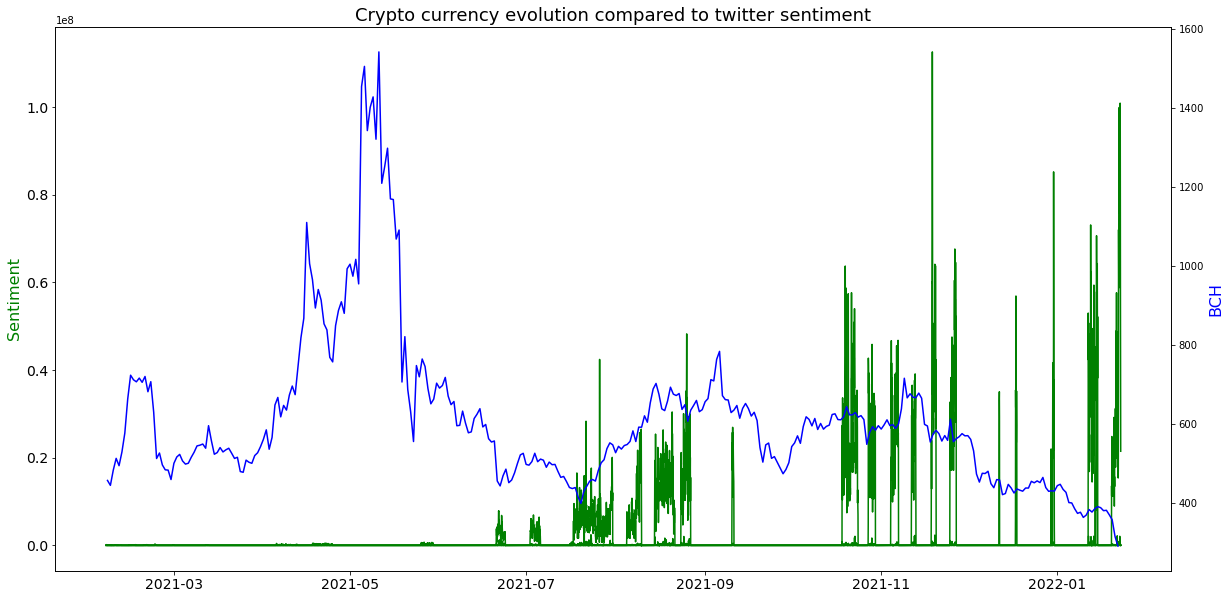

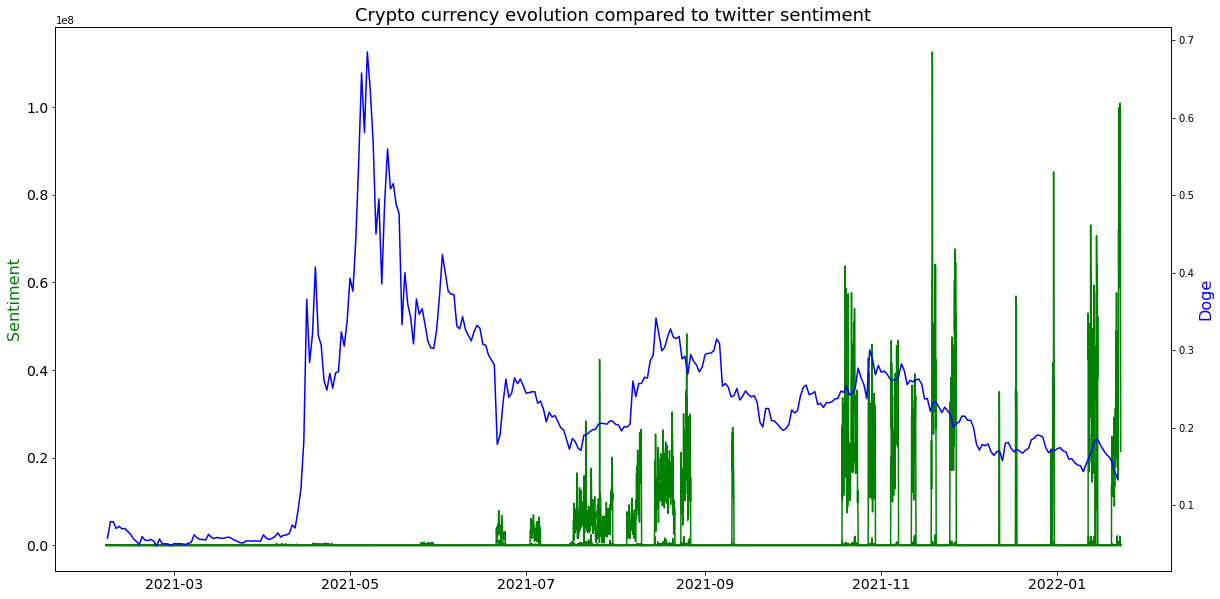

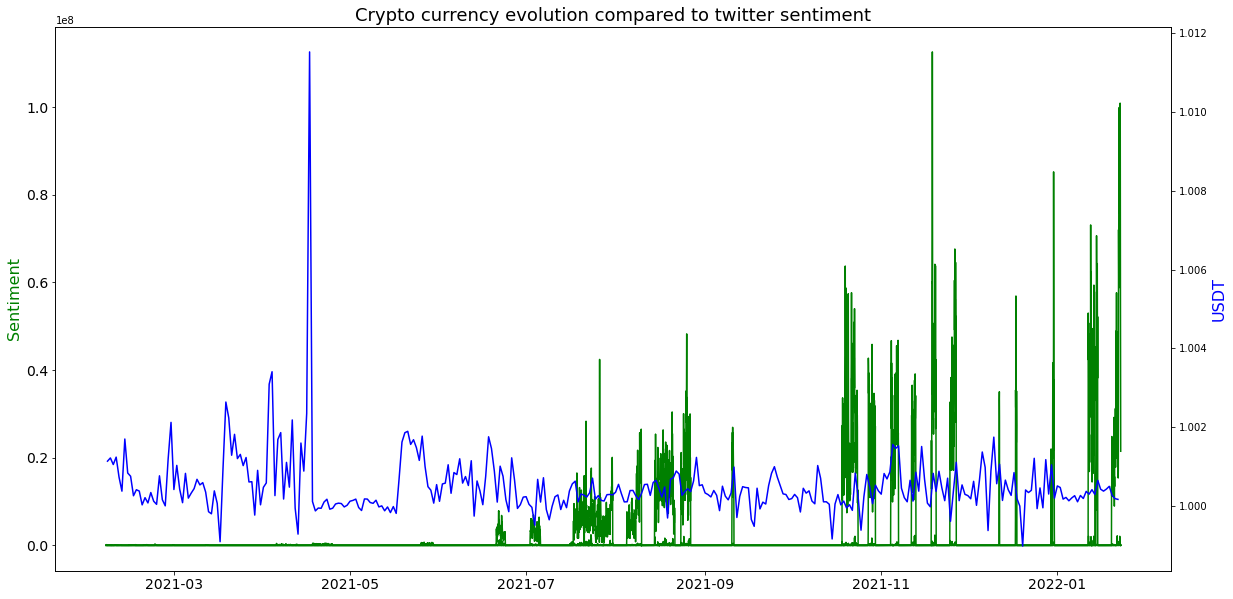

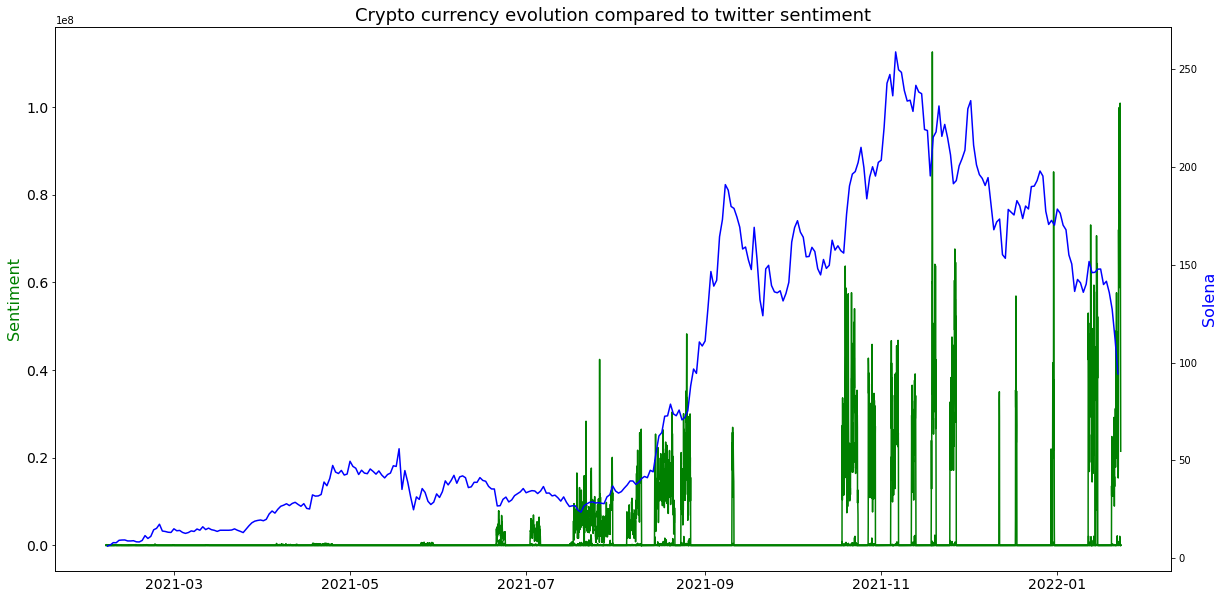

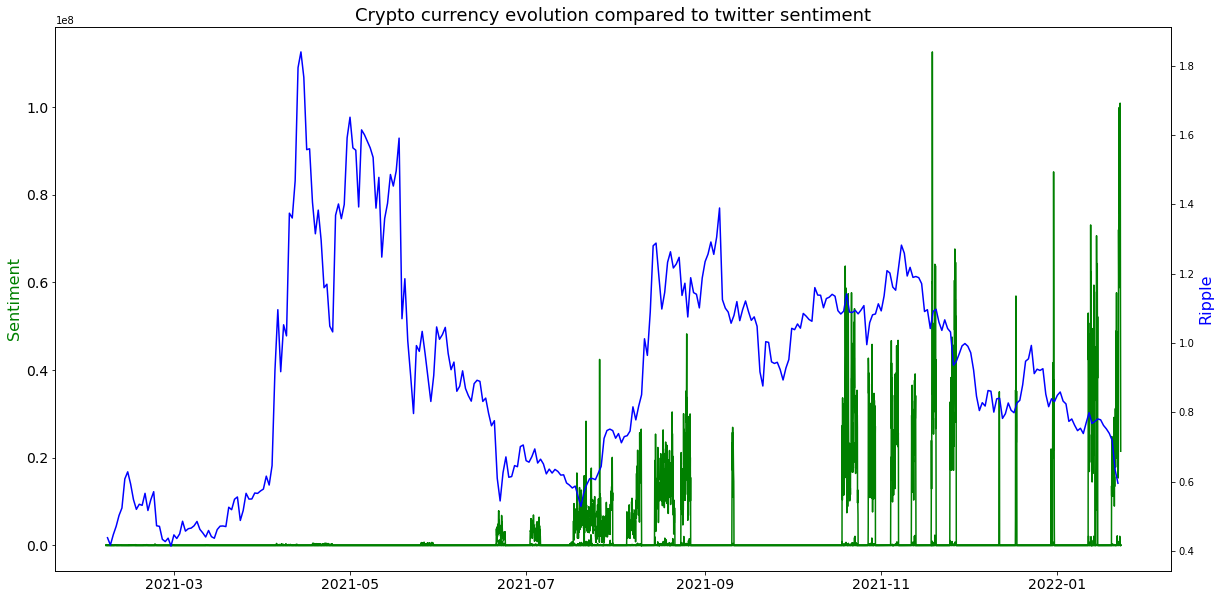

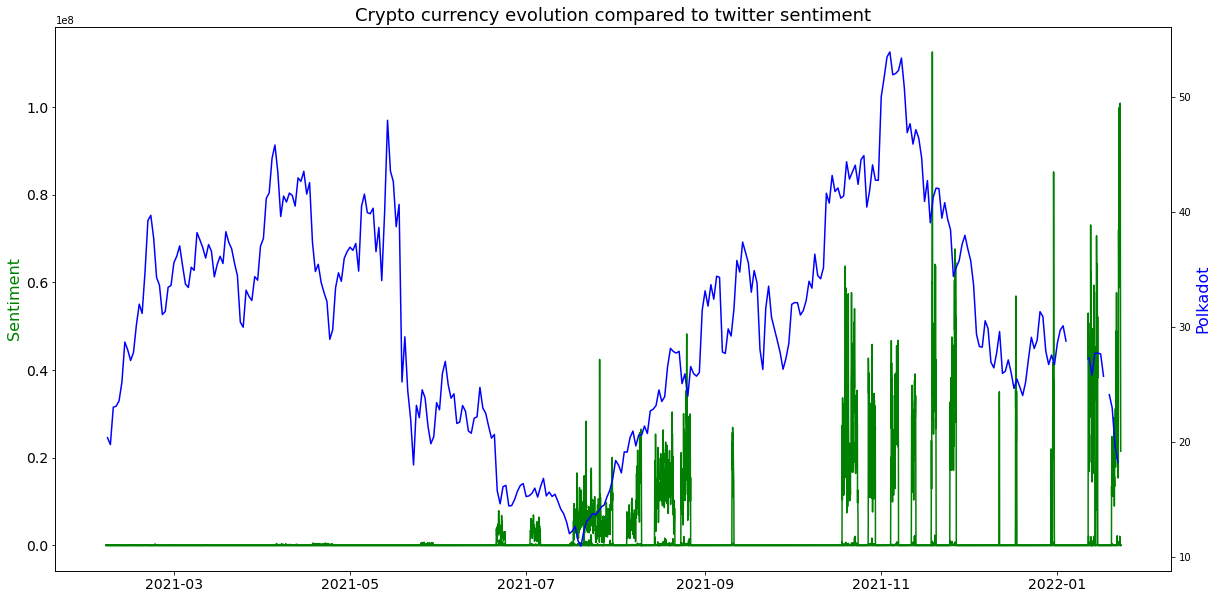

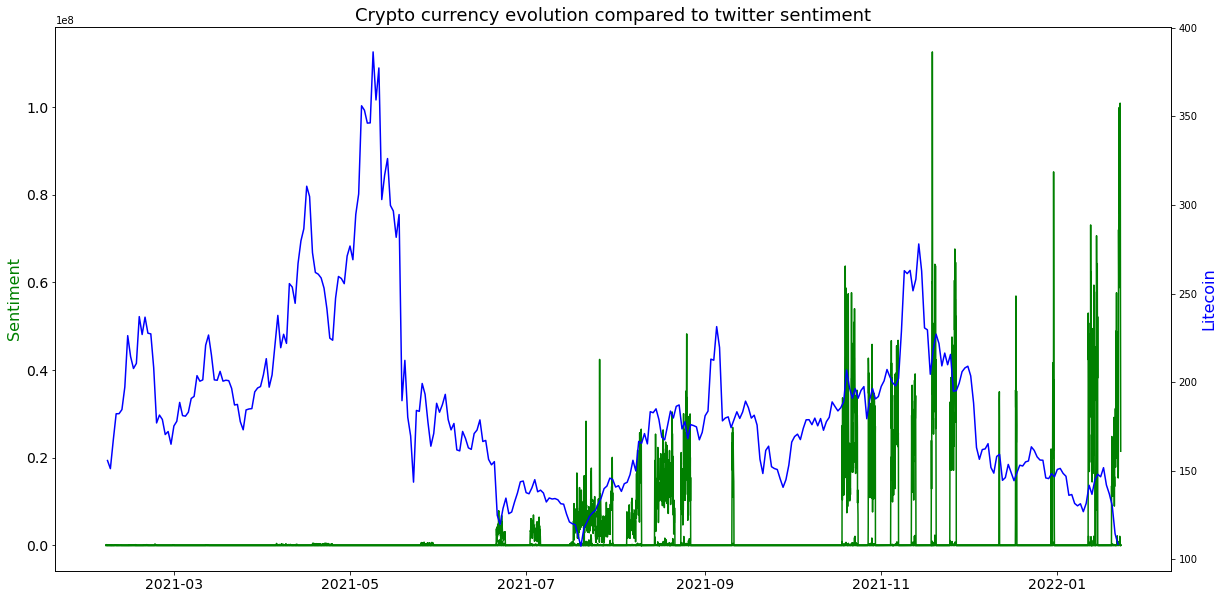

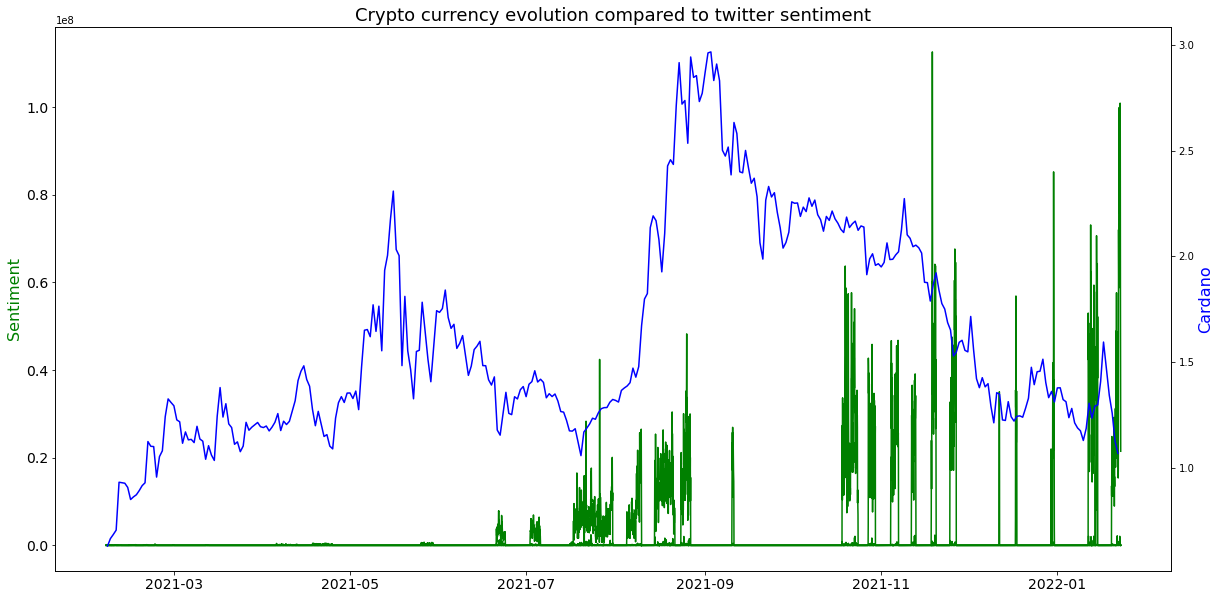

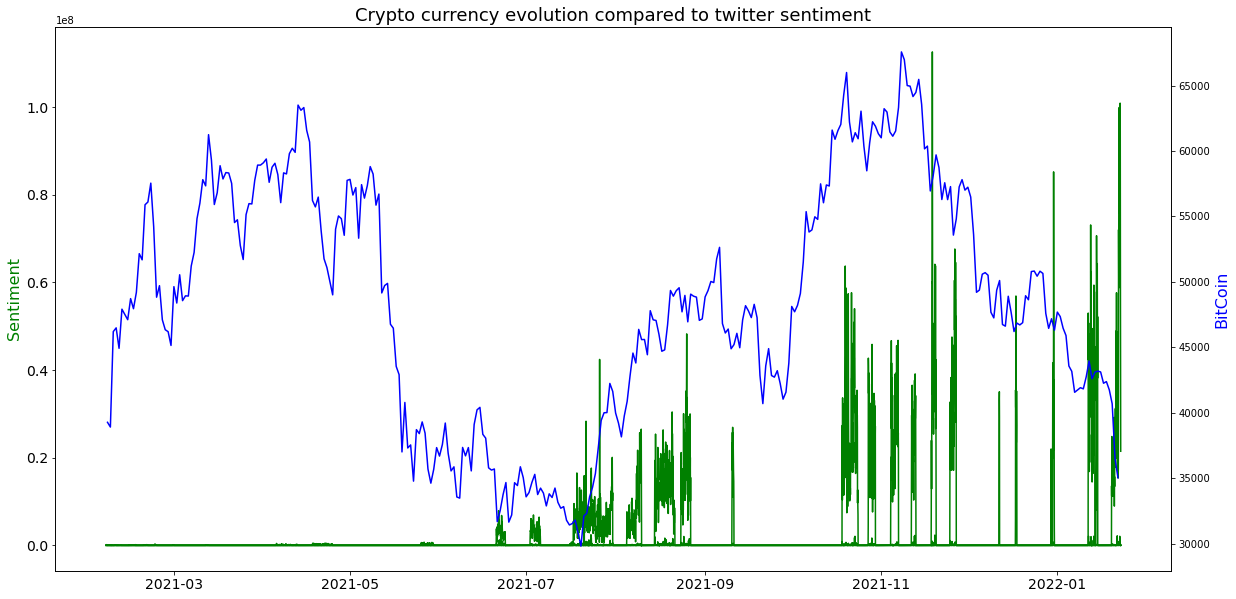

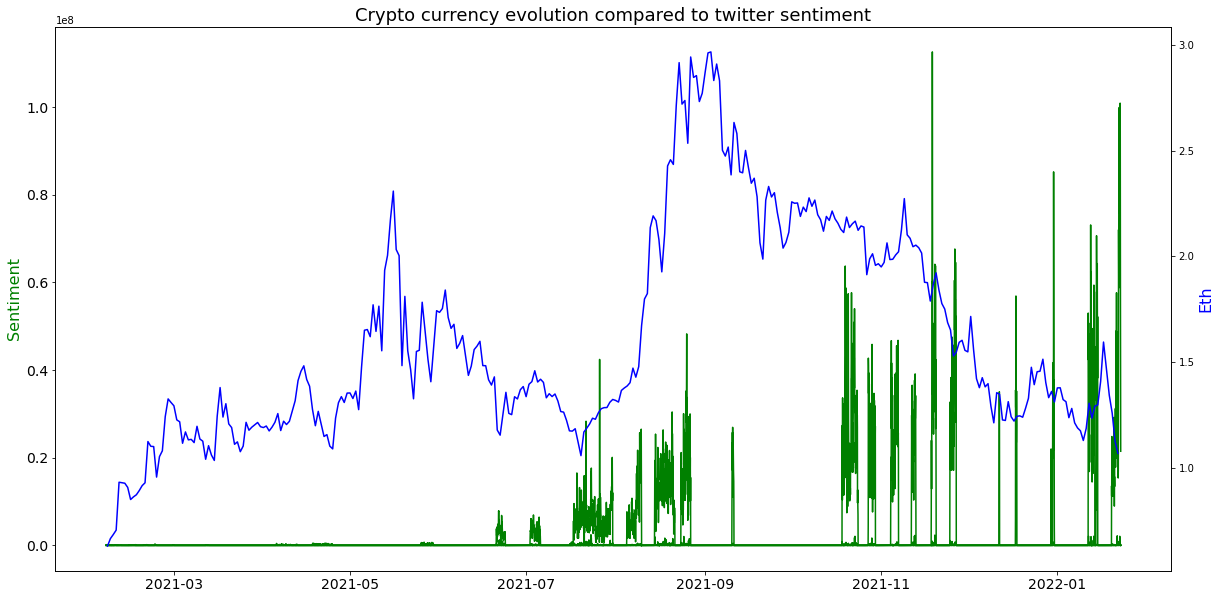

In [64]:
#BCH
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(df_bch_grouped.index, df_bch_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("BCH", color='b', fontsize=16)
plt.show()

#DOGE
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(df_doge_grouped.index, df_doge_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Doge", color='b', fontsize=16)
plt.show()

#USDT
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(df_usdt_grouped.index, df_usdt_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("USDT", color='b', fontsize=16)
plt.show()

#SOL
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(df_sol_grouped.index, df_sol_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Solena", color='b', fontsize=16)
plt.show()

#XRP
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(df_xrp_grouped.index, df_xrp_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Ripple", color='b', fontsize=16)
plt.show()

#DOT
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(df_dot_grouped.index, df_dot_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Polkadot", color='b', fontsize=16)
plt.show()

#LTC
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(df_ltc_grouped.index, df_ltc_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Litecoin", color='b', fontsize=16)
plt.show()

#ADA
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(df_ada_grouped.index, df_ada_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Cardano", color='b', fontsize=16)
plt.show()

#BTC
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(df_btc_grouped.index, df_btc_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("BitCoin", color='b', fontsize=16)
plt.show()

#ETH
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(df_ada_grouped.index, df_ada_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Eth", color='b', fontsize=16)
plt.show()

In [65]:
! pip install textblob 
from textblob import TextBlob

df = df_clean.copy()
df.dropna(subset=['hashtags'], inplace=True)
df = df[['text']] 
df.columns = ['tweets']
df.head()

,tweets
0,nice project \n\n\n\n\n\nortcoin ort okratech ...
1,Long Bitcoin short the banks ð§
2,Top Trending Cryptocurrency Post - DOGECOIN Se...
3,Can one expect another wave of BTC's decline s...
4,We will seeâ¦\n\nbitcoin btc bnb band bake $b...


In [66]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words(['english'])

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ALYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ALYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ALYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [67]:
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

In [68]:
def cleaning(data):
    #remove urls
    tweet_without_url = re.sub(r'http\S+',' ', data)

    #remove hashtags
    tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)

    #3. Remove mentions and characters that not in the English alphabets
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    #2. Tokenize
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)

    #3. Remove Puncs
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]

    #6. Joining
    return " ".join(text_cleaned)

In [69]:
df['cleaned_tweets'] = df['tweets'].apply(cleaning)
df['date'] = df_clean['date']
df['date_clean'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df.drop(columns='date',inplace=True)
df.head()

,tweets,cleaned_tweets,date_clean
0,nice project \n\n\n\n\n\nortcoin ort okratech ...,nice project ortcoin ort okratech bitcoin aird...,2021-06-22
1,Long Bitcoin short the banks ð§,Long Bitcoin short bank,2021-08-25
2,Top Trending Cryptocurrency Post - DOGECOIN Se...,Top Trending Cryptocurrency Post DOGECOIN Sell...,2021-07-02
3,Can one expect another wave of BTC's decline s...,Can one expect another wave BTC decline soon v...,2021-07-24
4,We will seeâ¦\n\nbitcoin btc bnb band bake $b...,We see bitcoin btc bnb band bake btc dCc xZ dP,2021-05-29


In [70]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [71]:
def crypto_price_cate(score):
    if score < 1:
        return 'negative'
    elif score == 1:
        return 'neutral'
    else:
        return 'positive'
def observe_period(period):
    res = df_btc_grouped.shift(period)/df_btc_grouped
    res = df_eth_grouped.shift(period)/df_eth_grouped
    res = df_ada_grouped.shift(period)/df_ada_grouped
    res = df_ltc_grouped.shift(period)/df_ltc_grouped
    res = df_dot_grouped.shift(period)/df_dot_grouped
    res = df_xrp_grouped.shift(period)/df_xrp_grouped
    res = df_sol_grouped.shift(period)/df_sol_grouped
    res = df_usdt_grouped.shift(period)/df_usdt_grouped
    res = df_doge_grouped.shift(period)/df_doge_grouped
    res = df_bch_grouped.shift(period)/df_bch_grouped    
    res = res.apply(crypto_price_cate)
    return res 

time_sentiment = observe_period(7) # compare price ratio in 7 days. price_7_days_later/ price_now 
df['crypto_sentiment'] = df.date_clean.apply(lambda x: time_sentiment[x] if x in time_sentiment else np.nan)

In [72]:
df['subjectivity'] = df['cleaned_tweets'].apply(getSubjectivity)
df['polarity'] = df['cleaned_tweets'].apply(getPolarity)
df.head()

,tweets,cleaned_tweets,date_clean,crypto_sentiment,subjectivity,polarity
0,nice project \n\n\n\n\n\nortcoin ort okratech ...,nice project ortcoin ort okratech bitcoin aird...,2021-06-22,positive,1.00,0.600
1,Long Bitcoin short the banks ð§,Long Bitcoin short bank,2021-08-25,negative,0.35,-0.025
2,Top Trending Cryptocurrency Post - DOGECOIN Se...,Top Trending Cryptocurrency Post DOGECOIN Sell...,2021-07-02,negative,0.40,0.250
3,Can one expect another wave of BTC's decline s...,Can one expect another wave BTC decline soon v...,2021-07-24,negative,0.00,0.000
4,We will seeâ¦\n\nbitcoin btc bnb band bake $b...,We see bitcoin btc bnb band bake btc dCc xZ dP,2021-05-29,negative,0.00,0.000


In [73]:
def getSentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'
df['sentiment'] = df['polarity'].apply(getSentiment)
df['target'] = df['sentiment'] == df['crypto_sentiment']
df.head()
df.to_csv('df_data.csv')

In [74]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Bidirectional, SpatialDropout1D
from tensorflow.keras.models import load_model


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [75]:
df.head()

,tweets,cleaned_tweets,date_clean,crypto_sentiment,subjectivity,polarity,sentiment,target
0,nice project \n\n\n\n\n\nortcoin ort okratech ...,nice project ortcoin ort okratech bitcoin aird...,2021-06-22,positive,1.00,0.600,positive,True
1,Long Bitcoin short the banks ð§,Long Bitcoin short bank,2021-08-25,negative,0.35,-0.025,negative,True
2,Top Trending Cryptocurrency Post - DOGECOIN Se...,Top Trending Cryptocurrency Post DOGECOIN Sell...,2021-07-02,negative,0.40,0.250,positive,False
3,Can one expect another wave of BTC's decline s...,Can one expect another wave BTC decline soon v...,2021-07-24,negative,0.00,0.000,neutral,False
4,We will seeâ¦\n\nbitcoin btc bnb band bake $b...,We see bitcoin btc bnb band bake btc dCc xZ dP,2021-05-29,negative,0.00,0.000,neutral,False


In [76]:
X = df['cleaned_tweets']
y = pd.get_dummies(df['sentiment']).values
num_classes = df['sentiment'].nunique()

In [138]:
seed = 38 # fix random seed for reproducibility
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17936,) (4484,) (17936, 3) (4484, 3)


In [139]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [140]:
from tensorflow.keras.preprocessing import sequence
max_words = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(17936, 30) (4484, 30)


In [153]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM, GlobalMaxPooling1D
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

batch_size = 128
epochs = 10

max_features = 20000
embed_dim = 100

np.random.seed(seed)
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())
#model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           2000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 30, 32)            9632      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 32)            3104      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 2,012,835
Trainable params: 2,012,835
Non-trainable params: 0
______________________________________________

In [154]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/10
141/141 - 5s - loss: 0.6683 - accuracy: 0.7241 - val_loss: 0.3710 - val_accuracy: 0.8644
Epoch 2/10
141/141 - 4s - loss: 0.2474 - accuracy: 0.9207 - val_loss: 0.2349 - val_accuracy: 0.9273
Epoch 3/10
141/141 - 4s - loss: 0.0954 - accuracy: 0.9722 - val_loss: 0.2002 - val_accuracy: 0.9460
Epoch 4/10
141/141 - 4s - loss: 0.0376 - accuracy: 0.9903 - val_loss: 0.2293 - val_accuracy: 0.9384
Epoch 5/10
141/141 - 4s - loss: 0.0180 - accuracy: 0.9963 - val_loss: 0.2366 - val_accuracy: 0.9425
Epoch 6/10
141/141 - 4s - loss: 0.0089 - accuracy: 0.9982 - val_loss: 0.2559 - val_accuracy: 0.9393
Epoch 7/10
141/141 - 4s - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.2674 - val_accuracy: 0.9422
Epoch 8/10
141/141 - 4s - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.2847 - val_accuracy: 0.9411
Epoch 9/10
141/141 - 4s - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.2913 - val_accuracy: 0.9438
Epoch 10/10
141/141 - 4s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.3019 - val_accuracy: 0.9429

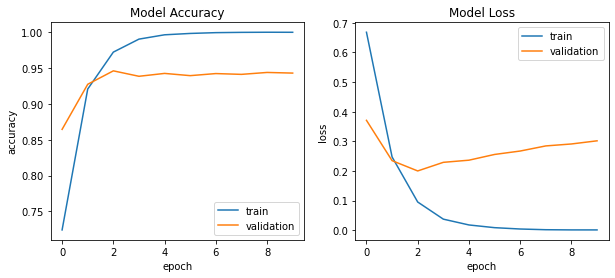

In [155]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)


In [156]:
# predict class with test set
y_pred_test =  np.argmax(model.predict(X_test), axis=1)
print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

Accuracy:	94.3%
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       478
           1       0.95      0.96      0.95      1782
           2       0.95      0.96      0.96      2224

    accuracy                           0.94      4484
   macro avg       0.92      0.90      0.91      4484
weighted avg       0.94      0.94      0.94      4484



2    2224
1    1782
0     478
dtype: int64
2    2250
1    1800
0     434
dtype: int64


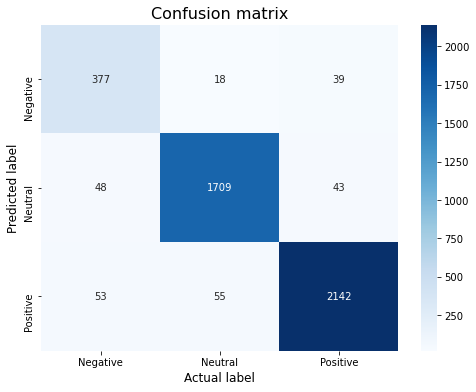

In [157]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [41]:
#bi-LSTM

In [122]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['cleaned_tweets'][0])
X, tokenizer = tokenize_pad_sequences(df['cleaned_tweets'])
print('After Tokenization & Padding \n', X[0])

In [ ]:
y = pd.get_dummies(df['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

In [45]:
import tensorflow.keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

In [47]:
vocab_size = 5000
embedding_size = 32
epochs = 50
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8

In [48]:
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [49]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', Precision(), Recall()])

In [50]:
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/50
106/106 [==============================] - 6s 24ms/step - loss: 0.9733 - accuracy: 0.4931 - precision: 0.5083 - recall: 0.1452 - val_loss: 0.9563 - val_accuracy: 0.4931 - val_precision: 0.6979 - val_recall: 0.0830
Epoch 2/50
106/106 [==============================] - 2s 16ms/step - loss: 0.9520 - accuracy: 0.5038 - precision: 0.5270 - recall: 0.2199 - val_loss: 0.9524 - val_accuracy: 0.4931 - val_precision: 0.5930 - val_recall: 0.3947
Epoch 3/50
106/106 [==============================] - 2s 17ms/step - loss: 0.9461 - accuracy: 0.5143 - precision: 0.5577 - recall: 0.2598 - val_loss: 0.9432 - val_accuracy: 0.5221 - val_precision: 0.6930 - val_recall: 0.2467
Epoch 4/50
106/106 [==============================] - 2s 17ms/step - loss: 0.9315 - accuracy: 0.5561 - precision: 0.6150 - recall: 0.3197 - val_loss: 0.9189 - val_accuracy: 0.5905 - val_precision: 0.6593 - val_recall: 0.3747
Epoch 5/50
106/106 [==============================] - 2s 18ms/step - loss: 0.9052 - accuracy: 0.5914

In [51]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.8720
Precision : 0.8854
Recall    : 0.8579
F1 Score  : 0.8714


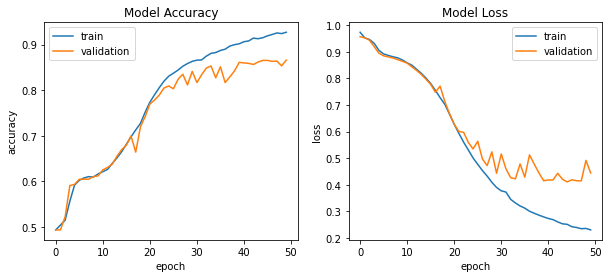

In [52]:
plot_training_hist(history)

2    2195
1    1833
0     456
dtype: int64
2    2232
1    2034
0     218
dtype: int64


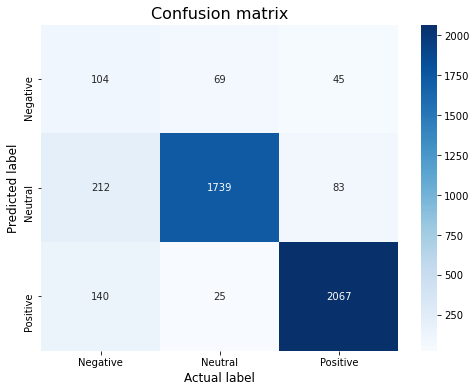

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)
